<a href="https://colab.research.google.com/github/dinuka125/japura-Git-Workshop/blob/master/Copy_of_CNN_%2B_LSTM_DIAL_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path ='/content/drive/My Drive/csv_files/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np

data=np.load(path+'datadial.npy')
target=np.load(path+'targetdial.npy')

In [ ]:
print(data.shape)
print(target.shape)
print(data.shape[1:])

(2371, 50, 4)
(2371,)
(50, 4)


In [ ]:
train_data=data[:1659]
train_target=target[:1659]

test_data=data[1659:]
test_target=target[1659:]

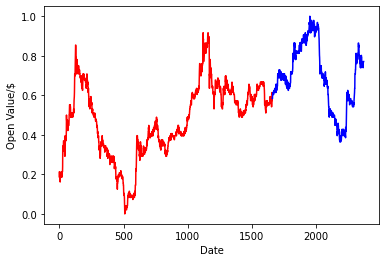

In [ ]:
from matplotlib import pyplot as plt

test_x_range=np.arange(1659,2371,1)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.show()

In [ ]:

from keras.layers import Input
from keras.models import Model
from keras.layers import LSTM
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import Flatten

input_layer = Input(shape=(data.shape[1:]))
conv1 = Conv1D(filters=256,
               kernel_size=3,
               strides=1,
               activation='relu',
              padding='same')(input_layer)

conv1=(MaxPooling1D(pool_size=2))(conv1)

droup0=(Dropout(0.2))(conv1)
#conv2=Conv1D(filters=128,kernel_size=3,activation='relu')(conv1)
#pool1=(MaxPooling1D(pool_size=2))(conv2)
#pool1=(Dropout(0.2))(pool1)
#conv3=Conv1D(filters=64,kernel_size=3,activation='relu')(pool1)
#pool2=(MaxPooling1D(pool_size=2))(conv3)

#flt=Flatten()(pool2)
#lstm1 = LSTM(96, return_sequences=True)(conv1)
#droup9=(Dropout(0.2))(lstm1)

#lstm1 = LSTM(96, return_sequences=True)(conv1)
#droup9=(Dropout(0.2))(lstm1)

lstm2=LSTM(units=96,return_sequences=True)(droup0)
droup1=(Dropout(0.2))(lstm2)

lstm3=LSTM(units=96,return_sequences=True)(droup1)
drop2=Dropout(0.2)(lstm3)

lstm4=LSTM(units=96,return_sequences=False)(drop2)
drop3=(Dropout(0.2))(lstm4)


#dense1=Dense(units=1,activation='linear')(drop3)

output_layer = Dense(1, activation='linear')(drop3)
model = Model(inputs=input_layer, outputs=output_layer)

model.compile(loss='mse',optimizer='adam',metrics=['mse', 'mae', 'mape'])

model.summary()



Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50, 4)]           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 50, 256)           3328      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 25, 256)           0         
_________________________________________________________________
dropout (Dropout)            (None, 25, 256)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 25, 96)            135552    
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 96)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 25, 96)            74112 

In [ ]:
history=model.fit(train_data,train_target,epochs=200,validation_split=0.10)

Epoch 1/200
47/47 [==============================] - 8s 36ms/step - loss: 0.0366 - mse: 0.0366 - mae: 0.1399 - mape: 51567.4170 - val_loss: 0.0029 - val_mse: 0.0029 - val_mae: 0.0413 - val_mape: 7.2320
Epoch 2/200
47/47 [==============================] - 0s 10ms/step - loss: 0.0056 - mse: 0.0056 - mae: 0.0560 - mape: 26346.4770 - val_loss: 0.0016 - val_mse: 0.0016 - val_mae: 0.0345 - val_mape: 5.6958
Epoch 3/200
47/47 [==============================] - 0s 10ms/step - loss: 0.0043 - mse: 0.0043 - mae: 0.0498 - mape: 4049.8096 - val_loss: 0.0013 - val_mse: 0.0013 - val_mae: 0.0311 - val_mape: 5.1874
Epoch 4/200
47/47 [==============================] - 0s 10ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0473 - mape: 8983.7326 - val_loss: 0.0063 - val_mse: 0.0063 - val_mae: 0.0734 - val_mape: 12.4605
Epoch 5/200
47/47 [==============================] - 0s 10ms/step - loss: 0.0044 - mse: 0.0044 - mae: 0.0502 - mape: 25003.0469 - val_loss: 8.1052e-04 - val_mse: 8.1052e-04 - val_mae: 0.0183 - 

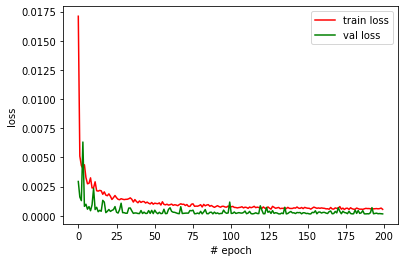

In [ ]:
plt.plot(history.history['loss'],'r',label='train loss')
plt.plot(history.history['val_loss'],'g',label='val loss')
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
result=model.predict(test_data)

from sklearn.metrics import r2_score

r2=r2_score(test_target,result)
print('r2 score:',r2)

r2 score: 0.9837420998289329


In [ ]:
score = model.evaluate(test_data, test_target, verbose = 0) 
print("%s: %.2f%%" % (model.metrics_names[0], score[0]))
print("%s: %.2f%%" % (model.metrics_names[1], score[1]))
print("%s: %.2f%%" % (model.metrics_names[2], score[2]))
print("%s: %.2f%%" % (model.metrics_names[3], score[3]))
#print('Test loss:', score[0]) 
print('MAPE:', score[3])

loss: 0.00%
mse: 0.00%
mae: 0.01%
mape: 2.09%
MAPE: 2.0949783325195312


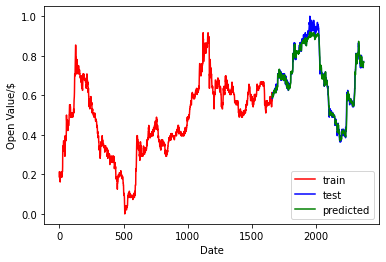

In [ ]:
#test_x_range=np.arange(1000,1209,1)
test_x_range=np.arange(1659,2371,1)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.plot(test_x_range,result,'g',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()

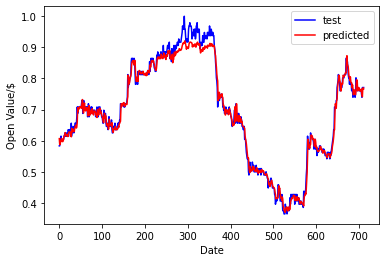

In [ ]:
plt.plot(test_target,'b',label='test')
plt.plot(result,'r',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()